# Seeking Alpha

<img  src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Seeking_Alpha_Logo.svg/2560px-Seeking_Alpha_Logo.svg.png'>

### Two APIs for Extracting Seeking Alpha

- 1 **finpie** (python module)

- 2 **rapidapi**

## 1.  Finpie

Finpie - a simple library to download some financial data<br>
For recreational and educational purposes. Creating easier access to some financial and news data.<br>

This library is an ongoing project designed to facilitate access to financial and economic data. It tries to cover potentially useful or interesting data points but unfortunately some functions will only return single point data which however could be aggregated over time to construct a limited time series. On the other hand, some functions that retrieve large amounts of data or depending on the data source will take some time to run. See the function index for more information on issues of data availability and relative run time.<br>

The company fundamentals module includes functions to retrive data from Yahoo Finance, MarketWatch, The Motley Fool, Finviz and Macrotrends. The price data module retrieves data from Yahoo Finance and CBOE. The news module enables historical news headline collection from the FT, NYT, WSJ, Barrons and Seeking Alpha based on keyword searches. The library also provides a function to get all Nasdaq-listed stock tickers as well as worldwide stock symbols (these need some cleaning still once retrieved).<br>

#### install finpie :
- https://pypi.org/project/finpie/

In [2]:
# !pip install finpie

In [94]:
import warnings
warnings.filterwarnings('ignore')

import finpie

In [97]:
fd = finpie.Fundamentals('AAPL', freq = 'A')
fd.analyst_ratings().head(3)

,action,rating_institution,rating,price_target
date,,,,
2023-01-26,Reiterated,Deutsche Bank,Buy,$170 → $160
2023-01-26,Reiterated,Canaccord Genuity,Buy,$200 → $170
2023-01-26,Downgrade,Exane BNP Paribas,Outperform → Neutral,$140


In [9]:
# fd = finpie.Fundamentals('AAPL')
# fd.transcripts(html = True)

## 2. Rapidapi Seeking Alpha

Seeking Alpha API from RapidAPI is an API that queries stock news, market-moving, price quotes, charts, indices, analysis, and many more from investors and experts on seeking alpha stock research platform. In addition, it has a comprehensive list of endpoints for different categories of data. <br>

Currently, the API has three pricing plans and a free subscription. It supports various programming languages, including Python, PHP, Ruby, and Javascript.<br>


**more detail**:
- https://rapidapi.com/blog/seeking-alpha-api-with-python-php-ruby-javascript-examples/

https://rapidapi.com/apidojo/api/seeking-alpha/

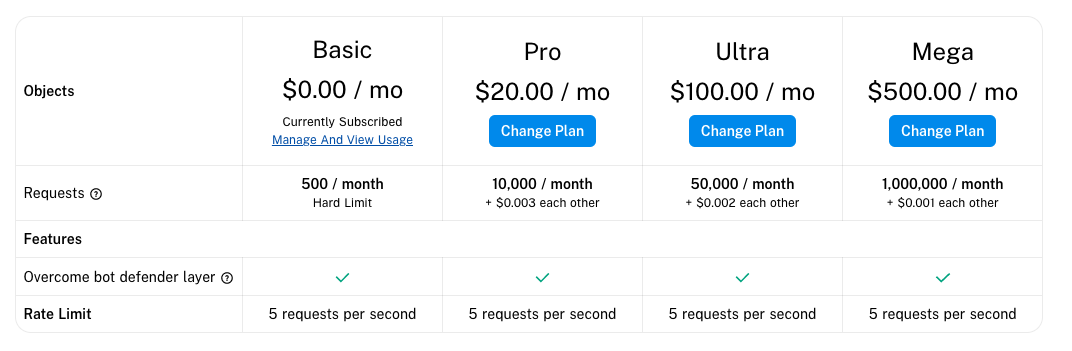

>**Due to rate limitation, It is used basic plan with 500 requests per month as free a option.**

#### We access to the following items:
- market
- symbol
- analysis
- article
- news
- press release
- transcript
- author
- comment
- screeners




#### Example( For Apple Earning Calls Transcripts List ):

In [99]:
#
import requests

url = "https://seeking-alpha.p.rapidapi.com/transcripts/v2/list"

querystring = {"id":"aapl","size":"20","number":"1"}

headers = {
    "X-RapidAPI-Key": "",
    "X-RapidAPI-Host": "seeking-alpha.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

pprint(response.text)

('{"data":[{"id":"4550156","type":"transcript","attributes":{"publishOn":"2022-10-27T19:46:03-04:00","isLockedPro":false,"commentCount":1,"gettyImageUrl":null,"videoPreviewUrl":null,"themes":{},"title":"Apple '
 'Inc. (AAPL) Q4 2022 Earnings Call '
 'Transcript","isPaywalled":false},"relationships":{"author":{"data":{"id":"44211","type":"author"}},"sentiments":{"data":[]},"primaryTickers":{"data":[{"id":"146","type":"tag"}]},"secondaryTickers":{"data":[]},"otherTags":{"data":[{"id":"49","type":"tag"}]}},"links":{"self":"/article/4550156-apple-inc-aapl-q4-2022-earnings-call-transcript"}},{"id":"4527231","type":"transcript","attributes":{"publishOn":"2022-07-28T21:11:05-04:00","isLockedPro":false,"commentCount":4,"gettyImageUrl":null,"videoPreviewUrl":null,"themes":{},"title":"Apple, '
 'Inc. (AAPL) CEO Tim Cook on Q3 2022 Results - Earnings Call '
 'Transcript","isPaywalled":false},"relationships":{"author":{"data":{"id":"44211","type":"author"}},"sentiments":{"data":[]},"primaryTickers

#### Example( For Apple Earning Calls Transcripts details ):

In [101]:
import requests

url = "https://seeking-alpha.p.rapidapi.com/transcripts/v2/get-details"

querystring = {"id":"4341792"}

headers = {
    "X-RapidAPI-Key": "",
    "X-RapidAPI-Host": "seeking-alpha.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

pprint(response.text)

('{"data":{"id":"4341792","type":"fullArticle","attributes":{"publishOn":"2020-04-30T21:51:10-04:00","isLockedPro":false,"commentCount":19,"gettyImageUrl":null,"videoPreviewUrl":null,"themes":{"sa-transcripts":{"slug":"sa-transcripts","kind":"common","non_theme":true},"aapl":{"slug":"aapl","kind":"common","non_theme":true},"technology":{"slug":"technology","kind":"sector","path":"/earnings/earnings-call-transcripts?sector=technology","title":"Technology"},"transcripts":{"slug":"transcripts","kind":"general","path":"/earnings/earnings-call-transcripts","title":"Transcripts"},"has-audio":{"slug":"has-audio","kind":"general"},"us":{"slug":"us","kind":"common","non_theme":true},"personal-computers":{"slug":"personal-computers","kind":"common","non_theme":true}},"title":"Apple '
 'Inc. (AAPL) CEO Tim Cook on Q2 2020 Results - Earnings Call '
 'Transcript","summary":[],"isPaywalled":false,"lastModified":"2020-05-01T00:48:35-04:00","closestTradingDate":"2020-05-01","isEarningsSlides":false,"i

# SEC EDGAR (SEC 10K)

<img src="https://www.investopedia.com/thmb/g9L8fvnxygS4QLrUrDo6vlK6R1I=/3000x2130/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-82880353-064135cb483940ff9230420d095b6d31.jpg" height=450 width=450>

We use Python 3 and the **SEC-API.io** Python package to help us find the links to all 10-K filings on EDGAR and then download them.

Our SEC filings download application will be structured into two components:

- 1. The first component of our Python application finds all URLs of 10-K filings on EDGAR filed between 1995 and 2022. We also consider older 10-K variants, that is 10-KT, 10KSB, 10KT405, 10KSB40, 10-K405. Our application also includes all amended/changed filings, for example 10-K/A. Once we generated a complete list of all URLs of 10-K filings, we’re going to save the list to a file to our hard disk.<br><br>
- 2. The second component reads the URLs from the file, and downloads all annual reports. We download up to 20 filings in parallel using the Render API of the SEC-API package and use Python’s multiprocessing package to speed up the download process.

Head over to https://sec-api.io to get your free API key so that we can start searching the SEC EDGAR database for 10-K filings.

**Install sec-api**:
- pip install sec-api

**More details:**
- https://medium.com/@jan_5421/how-to-download-and-scrape-10-k-filings-from-sec-edgar-b0d245fc8d48

#### We got the API from bellow site:
- https://sec-api.io/

In [37]:
from sec_api import QueryApi

queryApi = QueryApi(api_key="")

In [39]:
query = {
  "query": { "query_string": { 
      "query": "formType:\"10-K\" AND ticker:TSLA", # only 10-Ks
  }},
  "from": "0", # start returning matches from position null, i.e. the first matching filing 
  "size": "1"  # return just one filing
}

response = queryApi.get_filings(query)

In [41]:
import json 
print(json.dumps(response["filings"][0], indent=2))

{
  "ticker": "TSLA",
  "formType": "10-K",
  "accessionNo": "0001193125-14-069681",
  "cik": "1318605",
  "companyNameLong": "TESLA MOTORS INC (Filer)",
  "companyName": "TESLA MOTORS INC",
  "linkToFilingDetails": "https://www.sec.gov/Archives/edgar/data/1318605/000119312514069681/d668062d10k.htm",
  "description": "Form 10-K - Annual report [Section 13 and 15(d), not S-K Item 405]",
  "linkToTxt": "https://www.sec.gov/Archives/edgar/data/1318605/000119312514069681/0001193125-14-069681.txt",
  "filedAt": "2014-02-26T16:02:51-05:00",
  "documentFormatFiles": [
    {
      "sequence": "1",
      "size": "1589148",
      "documentUrl": "https://www.sec.gov/Archives/edgar/data/1318605/000119312514069681/d668062d10k.htm",
      "description": "10-K",
      "type": "10-K"
    },
    {
      "sequence": "2",
      "size": "71602",
      "documentUrl": "https://www.sec.gov/Archives/edgar/data/1318605/000119312514069681/d668062dex1035a.htm",
      "description": "EX-10.35A",
      "type": "EX

# 1. Generate a list of URLs of all 10-K filings

In [42]:
base_query = {
  "query": { 
      "query_string": { 
          "query": "PLACEHOLDER", # this will be set during runtime 
          "time_zone": "America/New_York"
      } 
  },
  "from": "0",
  "size": "200", # dont change this
  # sort returned filings by the filedAt key/value
  "sort": [{ "filedAt": { "order": "desc" } }]
}

In [102]:
# open the file we use to store the filing URLs
log_file = open("filing_urls.txt", "a")

# start with filings filed in 2022, then 2020, 2019, ... up to 1995
# uncomment next line to fetch all filings filed from 2022-1995
# for year in range(2021, 1994, -1):
for year in range(2022, 2020, -1):
    print("Starting download for year {year}".format(year=year))
  
  # a single search universe is represented as a month of the given year
    for month in range(1, 13, 1):
        # get 10-Q and 10-Q/A filings filed in year and month
        # resulting query example: "formType:\"10-Q\" AND filedAt:[2021-01-01 TO 2021-01-31]"
        universe_query = \
            "formType:(\"10-K\", \"10-KT\", \"10KSB\", \"10KT405\", \"10KSB40\", \"10-K405\") AND " + \
            "filedAt:[{year}-{month:02d}-01 TO {year}-{month:02d}-31]" \
            .format(year=year, month=month)
  
        # set new query universe for year-month combination
        base_query["query"]["query_string"]["query"] = universe_query;

        # paginate through results by increasing "from" parameter 
        # until we don't find any matches anymore
        # uncomment next line to fetch all 10,000 filings
        # for from_batch in range(0, 9800, 200): 
        for from_batch in range(0, 400, 200):
          # set new "from" starting position of search 
            base_query["from"] = from_batch;

            response = queryApi.get_filings(base_query)

            # no more filings in search universe
            if len(response["filings"]) == 0:
                break;

            # for each filing, only save the URL pointing to the filing itself 
            # and ignore all other data. 
            # the URL is set in the dict key "linkToFilingDetails"
            urls_list = list(map(lambda x: x["linkToFilingDetails"], response["filings"]))

            # transform list of URLs into one string by joining all list elements
            # and add a new-line character between each element.
            urls_string = "\n".join(urls_list) + "\n"

            log_file.write(urls_string)

        print("Filing URLs downloaded for {year}-{month:02d}".format(year=year, month=month))

log_file.close()

print("All URLs downloaded")

Starting download for year 2022
Filing URLs downloaded for 2022-01
Filing URLs downloaded for 2022-02
Filing URLs downloaded for 2022-03
Filing URLs downloaded for 2022-04
Filing URLs downloaded for 2022-05
Filing URLs downloaded for 2022-06
Filing URLs downloaded for 2022-07
Filing URLs downloaded for 2022-08
Filing URLs downloaded for 2022-09
Filing URLs downloaded for 2022-10
Filing URLs downloaded for 2022-11
Filing URLs downloaded for 2022-12
Starting download for year 2021
Filing URLs downloaded for 2021-01
Filing URLs downloaded for 2021-02
Filing URLs downloaded for 2021-03
Filing URLs downloaded for 2021-04
Filing URLs downloaded for 2021-05
Filing URLs downloaded for 2021-06
Filing URLs downloaded for 2021-07
Filing URLs downloaded for 2021-08
Filing URLs downloaded for 2021-09
Filing URLs downloaded for 2021-10
Filing URLs downloaded for 2021-11
Filing URLs downloaded for 2021-12
All URLs downloaded


# 2. Download all 10-Ks from SEC EDGAR

### All links saved in filing_urls.txt

In [65]:
from sec_api import RenderApi

renderApi = RenderApi(api_key="194a3ecd7c680ebdd1d68431f488e94b783773eae399e2b143842a1b497dca1e")

In [66]:
# download filing and save to "filings" folder
def download_filing(url):
    try:
        filing = renderApi.get_filing(url)
        # file_name example: 000156459019027952-msft-10k_20190630.htm
        file_name = url.split("/")[-2] + "-" + url.split("/")[-1] 
        download_to = "./filings/" + file_name
        with open(download_to, "w") as f:
            f.write(filing)
    except Exception as e:
        print("Problem with {url}".format(url=url))
        print(e)

In [79]:
# load URLs from log file
def load_urls():
    log_file = open("filing_urls.txt", "r")
    urls = log_file.read().split("\n") # convert long string of URLs into a list 
    log_file.close()
    return urls

In [81]:
from tqdm import tqdm
def download_all_filings():
    print("Start downloading all filings") 
    # uncomment next line to process all URLs
    # urls = load_urls()
    urls = load_urls()[1:40]
    print("{length} filing URLs loaded".format(length=len(urls)))
    
    for url in tqdm(urls):
        download_filing(url)
    print("All filings downloaded")

In [75]:
# import os
# import multiprocessing

# def download_all_filings():
#     print("Start downloading all filings")

#     download_folder = "./filings" 
#     if not os.path.isdir(download_folder):
#         os.makedirs(download_folder)

#     # uncomment next line to process all URLs
#     # urls = load_urls()
#     urls = load_urls()[1:40]
#     print("{length} filing URLs loaded".format(length=len(urls)))

#     number_of_processes = 20

#     with multiprocessing.Pool(number_of_processes) as pool:
#         pool.map(download_filing, urls)

#     print("All filings downloaded")

In [82]:
download_all_filings()

Start downloading all filings
39 filing URLs loaded


100%|███████████████████████████████████████████| 39/39 [00:24<00:00,  1.61it/s]

All filings downloaded


## Convert to Text

In [90]:
import codecs
from bs4 import BeautifulSoup
from pprint import pprint

# Open the file using codecs
path = './filings/000000412722000002-swks-20211001.htm'
html = codecs.open(path)

# Detect all HTML tags
soup = BeautifulSoup(html, 'html.parser')
# for script in soup(["script", "style"]):
#     print(script.decompose())

In [91]:
pprint(soup.text)

('\n'
 'swks-202110010000004127trueNo. '
 '12021FY10/1true00000041272020-10-032021-10-0100000041272020-03-27iso4217:USD00000041272021-01-22xbrli:sharesUNITED '
 'STATES SECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549FORM 10-K/A '
 'Amendment No. 1☑ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE '
 'SECURITIES EXCHANGE ACT OF 1934For the fiscal year ended October\xa01, 2021 '
 'OR☐TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES '
 'EXCHANGE ACT OF 1934For the transition period from '
 '__________to__________Commission file number 001-05560 Skyworks Solutions, '
 'Inc. (Exact name of registrant as specified in its '
 'charter)Delaware04-2302115(State or other jurisdiction of incorporation or '
 'organization)(I.R.S. Employer Identification No.)5260 California '
 'AvenueIrvineCalifornia92617(Address of principal executive offices)(Zip '
 'Code)(949)231-3000(Registrant’s telephone number, including area '
 'code)Securities registered pursuant to Section 12

 'number of shares that would have been earned pursuant to the terms of such '
 'awards based upon performance up through and including the day prior to the '
 'date of the change in control. In the event that the successor or surviving '
 'company does not agree to assume, or to substitute for, such outstanding '
 'equity awards on substantially similar terms with substantially equivalent '
 'economic benefits as exist for such award immediately prior to the change in '
 'control, then such awards would accelerate in full as of the change in '
 'control.In the event of Mr. Griffin’s death or permanent disability (within '
 'the meaning of Section 22(e)(3) of the IRC), the Griffin Agreement provides '
 'for full acceleration of the vesting of all then-outstanding equity awards '
 'subject to time-based vesting (including stock options, restricted stock '
 'awards, RSU awards, and all performance-based equity awards where the '
 'performance period has ended and the shares are earned bu

 'available under the Non-Qualified ESPP.Non-Qualified Employee Stock Purchase '
 'PlanWe maintain the Non-Qualified ESPP to provide employees of the Company '
 'and participating subsidiaries with an opportunity to acquire a proprietary '
 'interest in the Company through the purchase, by means of payroll '
 'deductions, of shares of the Company’s common stock at a discount from the '
 'market price of the common stock at the time of purchase. The Non-Qualified '
 'ESPP is intended for use primarily by employees located outside the United '
 'States. Under the plan, eligible employees may purchase common stock through '
 'payroll deductions of up to 10% of compensation. The price per share is the '
 'lower of 85% of the market price at the beginning or end of each six-month '
 'offering period.36ITEM 13. CERTAIN RELATIONSHIPS AND RELATED TRANSACTIONS, '
 'AND DIRECTOR INDEPENDENCE.Certain Relationships and Related Transactions: '
 'Other than compensation agreements and other arrangem